In [1]:
import xarray as xr
import pyresample as pr
from matplotlib import pyplot
%matplotlib inline

In [2]:
dst = xr.open_dataset("precip_RACMO2.3p2_monthly_ANT27_197901_201612_regrid.nc")

In [3]:
# Example how to construct your own area definition for resampling.
# Provide your own grid definition, proj_dict and upper left corner coordinates
# 
shape=(1700,1700)
resolution=5000
area_id = 'ease_sh'
proj_dict = {'proj': 'laea', 'lat_0': -90, 'lon_0': 0, 'a': 6371228.0, 'units': 'm'}

upper_left_extent = (-4145849.0625, 4345849.0625)
ad = pr.geometry.AreaDefinition.from_ul_corner(area_id, proj_dict, shape, upper_left_extent, resolution)

In [4]:
# Define area definition for irregular grid
source_def = pr.geometry.SwathDefinition(lats=dst['lat'], lons=dst['lon'])

In [5]:
# For dynamic target areas based on original grid, use GridDefinition.compute_optimal_bb_area method.
# Otherwise construct your own target area definition as in the cell above
# Result array is supposed to be matching the output file and could be written directly into 
# the output GeoTIFF file given the data type and dimensions match.
# area_def = gd.compute_optimal_bb_area()
precip = dst['precip'][0][0]
area_def = ad
result = pr.kd_tree.resample_nearest(source_def, precip.values, ad, radius_of_influence=25000, epsilon=0.5)

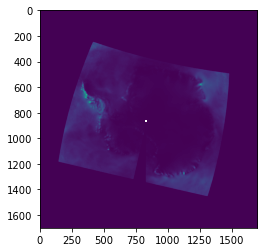

In [6]:
pyplot.imshow(result)

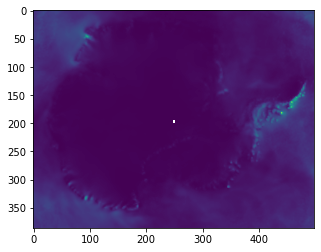

In [7]:
# Original data
pyplot.imshow(precip)